In [50]:
from pylab import *
from utility_bfsolver3D import *
from utility_error import *

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=12)

tb = BFCalc3D_Toolbox()
er = BFCalc3D_Error()

# 1. Try One Case

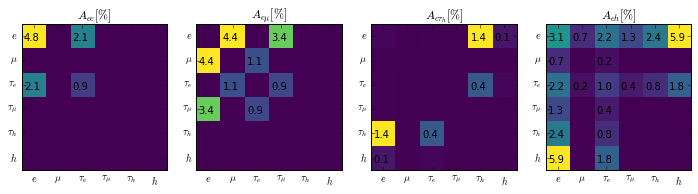

In [2]:
# defining bfCalc
trigger,tag = "e","2b"
a,aVar         = tb.GetAcc  (trigger,tag,"isrup")
ndata,ndataVar = tb.GetNData(trigger,tag)
nmcbg,nmcbgVar = tb.GetNMcbg(trigger,tag)
nfake,nfakeVar = tb.GetNFake(trigger,tag)

tb.Plot_Imshow4Matrix(a,trigger)
plt.savefig("../plot/acceptance/{}{}.png".format(trigger,tag),dpi=300)

# 2. Calculate Statistical Error

In [3]:
statistcal = [ er.errStat(100,source) for source in ["data","mcbg","fake","mcsg"] ]

e-2b: 100%|██████████| 100/100 [00:07<00:00, 14.49it/s]


In [2]:
sysCrossSection = [ er.errSystem_CrossSection(source) for source in ["mcbg","fake","mcsg"] ]
sysObjectEff = [ er.errSystem_ObjectEff(source) for source in ["e","mu","tau"] ]
sysTTTheory = [ er.errSystem_TTTheory(source) for source in ["isrup","fsrup","up","hdampup"] ]

In [3]:
statistcal = [
 array([[0.00059531, 0.00053356, 0.00128681],
        [0.00100124, 0.00094273, 0.00225405],
        [0.00077762, 0.00052594, 0.00144344],
        [0.00136686, 0.00105694, 0.00252028]]),
 array([[6.27927072e-05, 1.43300027e-04, 3.27327944e-04],
        [5.77537900e-05, 1.27510055e-04, 2.20138981e-04],
        [1.69834468e-04, 7.25365815e-05, 3.92492339e-04],
        [1.67043616e-04, 7.65263745e-05, 2.89495977e-04]]),
 array([[3.04986154e-05, 3.57147994e-05, 1.70075254e-04],
        [3.81131511e-05, 4.32860901e-05, 2.19111504e-04],
        [1.80411242e-16, 2.08166817e-16, 2.08166817e-16],
        [2.08166817e-16, 1.38777878e-16, 1.80411242e-16]]),
 array([[0.00030539, 0.00025501, 0.00070532],
        [0.00048078, 0.00040015, 0.00095557],
        [0.0003701 , 0.00030923, 0.00079832],
        [0.00057612, 0.00043863, 0.00099049]])
]
err = np.array(statistcal+sysCrossSection+sysObjectEff+sysTTTheory).transpose(1,0,2)

In [71]:
for cata,cataname in enumerate(["mu1b","mu2b","e1b","e2b"]):
    error = np.abs(err[cata])

    x = 0.1086 * np.ones_like(error)
    y = np.arange(error.shape[0])[::-1]*2
    plt.figure(figsize=(3,0.4*y.max()))

    plt.errorbar(x[:,0],y+0.3,xerr=error[:,0], fmt='.',color='C0')
    plt.errorbar(x[:,1],y-0.0,xerr=error[:,1], fmt='.',color='C1')
    plt.errorbar(x[:,2],y-0.3,xerr=error[:,2], fmt='.',color='C2')

    for i in range(error.shape[0]):
        plt.text(0.114,y[i]+0.4,"{:4.4f}".format(error[i,0]),fontsize=8,color='C0')
        plt.text(0.114,y[i]-0.1  ,"{:4.4f}".format(error[i,1]),fontsize=8,color='C1')
        plt.text(0.114,y[i]-0.6,"{:4.4f}".format(error[i,2]),fontsize=8,color='C2')

    plt.xlim(0.104,0.118)
    plt.ylim(-2,y.max()+2)
    #plt.axvline(x=0.1086,c="k")
    plt.yticks([])
    #plt.xticks([])
    plt.savefig("../plot/error/{}.png".format(cataname),dpi=300)
    plt.close()

In [9]:
error = err[0]
error.shape

(14, 3)

In [16]:
a

array([[0.00083032, 0.00090409, 0.00152659],
       [0.00129671, 0.00096686, 0.00244292],
       [0.00095404, 0.00073202, 0.00184926],
       [0.00146738, 0.00113336, 0.00296476]])